In [1]:
import pandas as pd

In [2]:
import numpy as np
import os

In [3]:
%cd /Users/aripiralasrinivas/Data Science/repos/mlframework/src

/Users/aripiralasrinivas/Data Science/repos/mlframework/src


In [4]:
WORKING_DIR = '/Users/aripiralasrinivas/Data Science/repos/mlframework'

In [5]:
file_path= os.path.join(WORKING_DIR, 'input')
file_path

'/Users/aripiralasrinivas/Data Science/repos/mlframework/input'

In [6]:
from utils import write_df, read_df, select_cols, missing_values_table, get_file_path 

In [7]:
train_path= get_file_path('train_mean_3fold.csv')
test_path = get_file_path('test_mean_imputed.csv')
train_path

'../input/train_mean_3fold.csv'

In [8]:
train_df = pd.read_csv(train_path, index_col=0)
test_df= pd.read_csv(test_path, index_col=0)

In [9]:
train_df.head()

,LotConfig,Street,Heating,LandSlope,Condition1,BsmtFinType1,GarageType,Foundation,PavedDrive,Utilities,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,kfold
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
37,Inside,Pave,GasA,Gtl,Norm,Rec,Attchd,CBlock,Y,AllPub,...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,2009.0,153000.0,1.0
1247,Inside,Pave,GasA,Gtl,Norm,GLQ,Attchd,CBlock,Y,AllPub,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2010.0,169900.0,2.0
308,Inside,Pave,GasA,Gtl,Norm,BLQ,Detchd,CBlock,Y,AllPub,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2009.0,82500.0,1.0
1041,Inside,Pave,GasA,Gtl,Feedr,GLQ,Attchd,CBlock,Y,AllPub,...,40.0,0.0,0.0,0.0,0.0,0.0,7.0,2008.0,173000.0,1.0
1353,CulDSac,Pave,GasA,Gtl,Norm,GLQ,Attchd,PConc,Y,AllPub,...,86.0,0.0,0.0,0.0,0.0,0.0,3.0,2010.0,410000.0,2.0


In [26]:
test_df.head()

,LotConfig,Street,Heating,LandSlope,Condition1,BsmtFinType1,GarageType,Foundation,PavedDrive,Utilities,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,Inside,Pave,GasA,Gtl,Feedr,Rec,Attchd,CBlock,Y,AllPub,...,140.0,0.0,0.0,0.0,120.0,0.0,0.0,6.0,2010.0,-1.0
1,Corner,Pave,GasA,Gtl,Norm,ALQ,Attchd,CBlock,Y,AllPub,...,393.0,36.0,0.0,0.0,0.0,0.0,12500.0,6.0,2010.0,-1.0
2,Inside,Pave,GasA,Gtl,Norm,GLQ,Attchd,PConc,Y,AllPub,...,212.0,34.0,0.0,0.0,0.0,0.0,0.0,3.0,2010.0,-1.0
3,Inside,Pave,GasA,Gtl,Norm,GLQ,Attchd,PConc,Y,AllPub,...,360.0,36.0,0.0,0.0,0.0,0.0,0.0,6.0,2010.0,-1.0
4,Inside,Pave,GasA,Gtl,Norm,ALQ,Attchd,PConc,Y,AllPub,...,0.0,82.0,0.0,0.0,144.0,0.0,0.0,1.0,2010.0,-1.0


In [27]:
train_df.shape

(1460, 77)

In [28]:
test_df.shape

(1459, 76)

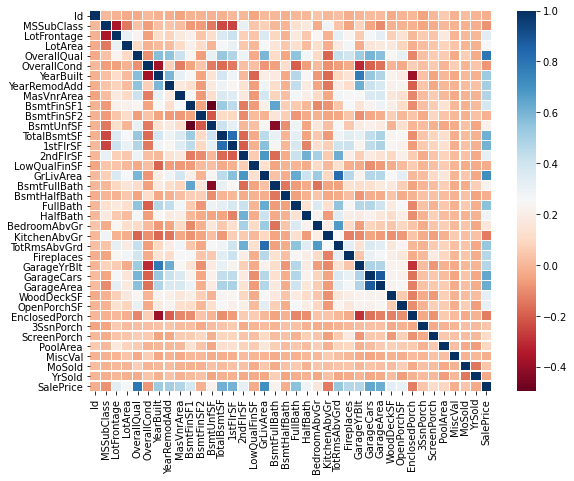

In [11]:
from visualize import generate_heatmap
generate_heatmap(train_df.drop('kfold', 1))

In [12]:
cat_cols = [col for col in train_df.columns if train_df[col].dtype=='object']
num_cols= [col for col in train_df.columns if train_df[col].dtype in ('int64','float64')]


In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [14]:
def add(np_arr, n=5):
    print(f'n is {n}')
    return np_arr+n

In [13]:
from utils import select_cols
cat_df = select_cols(train_df, 'CATEGORICAL')
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 37 to 826
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   LandSlope      1460 non-null   object
 1   Exterior2nd    1460 non-null   object
 2   GarageType     1460 non-null   object
 3   Utilities      1460 non-null   object
 4   BsmtCond       1460 non-null   object
 5   CentralAir     1460 non-null   object
 6   RoofMatl       1460 non-null   object
 7   Functional     1460 non-null   object
 8   HeatingQC      1460 non-null   object
 9   Heating        1460 non-null   object
 10  HouseStyle     1460 non-null   object
 11  KitchenQual    1460 non-null   object
 12  ExterQual      1460 non-null   object
 13  GarageFinish   1460 non-null   object
 14  SaleCondition  1460 non-null   object
 15  Condition1     1460 non-null   object
 16  MSZoning       1460 non-null   object
 17  ExterCond      1460 non-null   object
 18  LotConfig      1460 non-null

In [25]:
cat_value_counts = [cat_df[col].nunique() for col in cat_df.columns]
cat_levels_df = pd.DataFrame(data=np.column_stack((cat_df.columns, cat_value_counts)), columns = ['cat_columns', 'levels'])

# cat_levels_df = pd.DataFrame(dict(zip(cat_df.columns, cat_value_counts)))
cat_levels_df.head()

,cat_columns,levels
0,LandSlope,3
1,Exterior2nd,16
2,GarageType,6
3,Utilities,2
4,BsmtCond,4


In [39]:
from matplotlib import pyplot as plt
import seaborn as sns
def generate_barplot(x, y, data, order=None, figsize=(12,7)):
    plt.figure(figsize=figsize)
    plt.xticks(rotation=90, fontweight='bold', fontsize='12', horizontalalignment='right')
    sns.set_theme(style="whitegrid")
    ax = sns.barplot(x=x, y=y, data=data, order=order)
    plt.show()

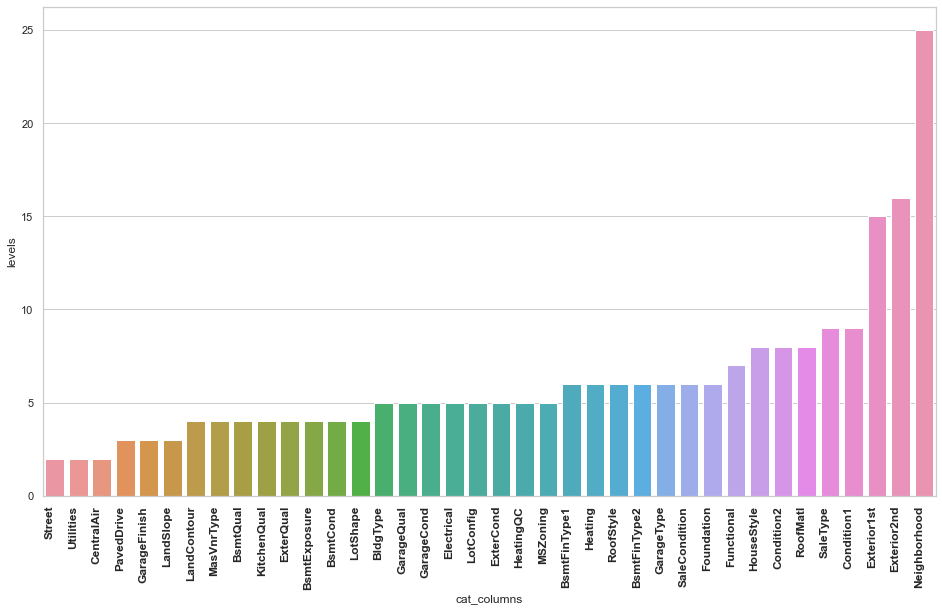

In [41]:
generate_barplot('cat_columns','levels', cat_levels_df.sort_values('levels'), figsize=(16,9))

In [15]:
train_df['LotArea'].values  + 5

array([ 8455,  9605, 11255, ...,  9047,  9722,  9942])

In [16]:
train_transformed_df = pd.read_csv(get_file_path('train_transformed.csv'))

In [17]:
cols = ['LotArea', 'MoSold','LotArea_add', 'MoSold_add', 'LotArea_add_square']
train_transformed_df[cols].head()

,LotArea,MoSold,LotArea_add,MoSold_add,LotArea_add_square
0,8450,2,8550,9,73102500
1,9600,5,9700,12,94090000
2,11250,9,11350,16,128822500
3,9550,2,9650,9,93122500
4,14260,12,14360,19,206209600


In [21]:
from feature_preprocessing import MissingValueImputer

In [46]:
print(len(train_df.columns[np.where(train_df.dtypes != np.float)[0]]))
np.where(train_df.dtypes != np.float)[0]

38


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37])

In [22]:
mean_numeric_imputer = MissingValueImputer(strategy='IMPUTE', strategy_numeric='mean', feature_type='NUMERIC')
median_both_imputer = MissingValueImputer(strategy='IMPUTE', strategy_numeric='median', feature_type='BOTH')

In [23]:
drop_imputer = MissingValueImputer(strategy='DROP_FEATURES', feature_type='ALL', drop_feature_threshold=0.4)

In [24]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [25]:

drop_imputer.missing_values_table(train_df)

Your selected dataframe has 81 columns.
There are 19 columns that have missing values.


,Missing Values,% of Total Values
PoolQC,1453,99.5
MiscFeature,1406,96.3
Alley,1369,93.8
Fence,1179,80.8
FireplaceQu,690,47.3
LotFrontage,259,17.7
GarageType,81,5.5
GarageYrBlt,81,5.5
GarageFinish,81,5.5
GarageQual,81,5.5


In [26]:
train_drop_imputed = drop_imputer.fit_transform(train_df)
train_imputed = mean_numeric_imputer.fit_transform(train_drop_imputed)
mean_numeric_imputer.missing_values_table(train_imputed)

Your selected dataframe has 81 columns.
There are 19 columns that have missing values.
Features not meeting the threshold 40.0 - 
 ['PoolQC' 'MiscFeature' 'Alley' 'Fence' 'FireplaceQu']
Started Numerical mean imputation
Numerical Imputer is fit and completed the transformation
Your selected dataframe has 76 columns.
There are 11 columns that have missing values.


,Missing Values,% of Total Values
GarageFinish,81,5.5
GarageCond,81,5.5
GarageQual,81,5.5
GarageType,81,5.5
BsmtExposure,38,2.6
BsmtFinType2,38,2.6
BsmtCond,37,2.5
BsmtFinType1,37,2.5
BsmtQual,37,2.5
MasVnrType,8,0.5


In [27]:
from utils import select_cols
# select_cols(train_drop_imputed.copy(), 'CATEGORICAL')
# median_both_imputer.categorical_feature_modes

In [28]:
# train_drop_imputed = drop_imputer.fit_transform(train_df)
train_imputed = median_both_imputer.fit_transform(train_drop_imputed)
median_both_imputer.missing_values_table(train_imputed)

Started Numerical median imputation
Numerical Imputer is fit and completed the transformation
df shape is (1460, 76)
df shape is (1460, 76)
Your selected dataframe has 76 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [29]:
# drop_imputer.df_feature_type
from utils import select_cols
temp = select_cols(train_df, 'ALL')
# temp

In [30]:
# from utils import select_cols
# len(drop_imputer.percent_missing_columns)
# df_feature_type = select_cols(test_df.copy(), 'ALL')
# df_feature_type[drop_imputer.percent_missing_columns]

In [31]:
test_df['SalePrice']=-1
test_drop_imputed = drop_imputer.transform(test_df)
drop_imputer.missing_values_table(test_drop_imputed)

Your selected dataframe has 76 columns.
There are 28 columns that have missing values.


,Missing Values,% of Total Values
LotFrontage,227,15.6
GarageYrBlt,78,5.3
GarageCond,78,5.3
GarageQual,78,5.3
GarageFinish,78,5.3
GarageType,76,5.2
BsmtCond,45,3.1
BsmtQual,44,3.0
BsmtExposure,44,3.0
BsmtFinType1,42,2.9


In [33]:
test_imputed = median_both_imputer.transform(test_drop_imputed)
# test_imputed
median_both_imputer.missing_values_table(test_imputed)

df shape is (1459, 76)
Your selected dataframe has 76 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [ ]:
test_drop_imputed[mean_imputer.remaining_non_numeric_cols].info()

In [ ]:
df_feature_type = select_cols(test_drop_imputed.copy(), "NUMERIC")
df_feature_type.info()

In [ ]:
mean_imputer.strategy_numeric

In [ ]:
mean_imputer.missing_values_table(train_df)

In [ ]:
mean_imputer.missing_values_table(train_x_imputed)

In [ ]:
mean_imputer.missing_values_table(test_df)

In [ ]:
test_df['SalePrice']=-1

In [ ]:
test_df_imputed = mean_imputer.transform(test_df)

In [ ]:
mean_imputer.missing_values_table(test_df_imputed)

In [ ]:
test_df_imputed.info()

In [ ]:
sub_cols = ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
target = train_df[['GarageFinish']]
train_knn = train_df[sub_cols]
test_knn = test_df[sub_cols]
test_knn.shape

In [ ]:
from impute import knn_impute

In [ ]:
target = train_df['GarageFinish'].values

In [ ]:
target_imputed = knn_impute(target, train_knn, 7, aggregation_method="mode")

In [ ]:
target_imputed.head()

In [ ]:
imputer.missing_values_table(train_knn)

In [ ]:
imputer.missing_values_table(train_df[['GarageFinish']])

In [ ]:
target_imputed.columns = ['GarageFinish']
target_imputed.head()

In [ ]:
imputed_df = pd.DataFrame()
imputed_df = pd.concat([imputed_df, target_imputed], axis=1)
imputed_df.head()

In [ ]:
imputer.missing_values_table(target_imputed)

In [ ]:
nas = train_df.isna().sum()
nas_df=pd.DataFrame(nas, columns=['null_count'])

In [ ]:
np.array(nas_df[nas_df.null_count>0].index)

In [ ]:
imputer.missing_values_table(train_df)

In [ ]:
import numbers
is_numeric = [all(isinstance(n, numbers.Number) for n in train_df.iloc[:, i]) for i, x in enumerate(train_df)]

In [ ]:
len(train_df.iloc[:,~np.array(is_numeric)].columns)

In [ ]:
len(train_df.columns)

In [ ]:
from knn_impute import KNNImputation

In [ ]:
from utils import get_columns_with_missing_values, missing_values_table

In [ ]:
missing_values_table(train_df) 

In [ ]:
knn_imputer = KNNImputation(k_neighbors=7)

In [ ]:
# train_imputed_df = knn_imputer.fit(train_df)

In [ ]:
# missing_values_table(train_imputed_df)

In [ ]:
numeric_set = {'MoSold', 'OverallCond', 'MiscVal', 'BsmtFinSF2', 'TotRmsAbvGrd', 'GarageArea', 'MSSubClass', 'BsmtFullBath', 'LotFrontage', 'KitchenAbvGr', 'BedroomAbvGr', 'GrLivArea', 'YearRemodAdd', 'BsmtUnfSF', 'WoodDeckSF', 'GarageYrBlt', '3SsnPorch', 'FullBath', 'LotArea', 'EnclosedPorch', 'GarageCars', 'Fireplaces', 'ScreenPorch', 'LowQualFinSF', 'HalfBath', 'YrSold', 'Id', 'OpenPorchSF', 'BsmtFinSF1', '2ndFlrSF', '1stFlrSF', 'PoolArea', 'OverallQual', 'BsmtHalfBath', 'YearBuilt', 'MasVnrArea', 'SalePrice', 'TotalBsmtSF'}
numeric_set.discard('LotFrontage')
numeric_list = list(numeric_set)

In [ ]:
import numbers
X = train_df.copy()
is_numeric = [all(isinstance(n, numbers.Number) for n in X.iloc[:, i]) for i, x in enumerate(X)]
is_all_numeric = sum(is_numeric) == len(is_numeric)
is_all_categorical = sum(is_numeric) == 0
is_mixed_type = not is_all_categorical and not is_all_numeric

In [ ]:
numeric_columns = X.iloc[:, is_numeric].columns
categorical_columns = X.iloc[:, ~np.array(is_numeric)].columns

In [ ]:
numeric_columns

In [ ]:
X_numeric =  X[numeric_columns]
X_numeric.head()

In [ ]:
numeric_columns = ['MiscVal', 'EnclosedPorch', 'ScreenPorch', 'TotalBsmtSF', 'SalePrice', 'OverallCond', 'HalfBath', 'Fireplaces', 'YearRemodAdd', 'YrSold', 'MSSubClass', 'LotFrontage', 'LotArea', '1stFlrSF', 'BsmtFinSF1', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'LowQualFinSF', 'PoolArea', 'BsmtFinSF2', '2ndFlrSF', '3SsnPorch', 'MasVnrArea', 'MoSold', 'FullBath', 'OverallQual', 'GarageArea', 'Id', 'BsmtFullBath', 'BsmtHalfBath', 'WoodDeckSF', 'OpenPorchSF', 'YearBuilt', 'BsmtUnfSF', 'GarageCars', 'GarageYrBlt', 'GrLivArea']

In [ ]:
target_col = 'LotFrontage'
list(set(numeric_columns) - set(target_col))

In [ ]:
numeric_col_set = set(numeric_columns)
numeric_col_set.discard(target_col)
list(numeric_col_set)

In [ ]:
knn_imputer.categorical_columns

In [ ]:
train_imputed_df = knn_imputer.fit(train_df)

In [ ]:
sub_cols

In [ ]:
train_imputed_df = knn_imputer.fit(train_df[sub_cols +['GarageFinish']])

In [ ]:
missing_values_table(train_df[sub_cols +['GarageFinish']])

In [ ]:
missing_values_table(train_imputed_df)

In [ ]:
percent_na = missing_values_table(train_df)
percent_na.columns

In [ ]:
features_greater_than_50_percent_missing = percent_na[(percent_na['% of Total Values'] >30)].index.values

In [ ]:
new_sub_cols = [col for col in train_df.columns if col not in features_greater_than_50_percent_missing]

In [ ]:
print(len(new_sub_cols))
train_imputed_df = knn_imputer.fit(train_df[new_sub_cols])

In [ ]:
missing_values_table(train_imputed_df)

In [ ]:
missing_values_table(train_df[new_sub_cols])

In [ ]:
target_imputed = knn_impute(target, train_df[new_sub_cols], 7, aggregation_method="mode")

In [ ]:
missing_values_table(target_imputed)

In [ ]:
missing_values_table(test_df)

In [ ]:
features_greater_than_40_percent_missing = percent_na[(percent_na['% of Total Values'] >40)].index.values
new_sub_cols = [col for col in train_df.columns if col not in features_greater_than_40_percent_missing]

In [ ]:
missing_values_table(test_df[new_sub_cols])

In [ ]:
test_without_na_df = test_df[new_sub_cols].dropna()

In [ ]:
test_df.head()

In [ ]:
test_without_na_df.shape

In [ ]:
test_outer =test_df[new_sub_cols].merge(test_without_na_df, on='Id', how='outer', suffixes=['','_'], indicator=True )

In [ ]:
test_outer.info()

In [ ]:
test_outer['_merge'].value_counts()

In [ ]:
test_incomplete = test_df[new_sub_cols].merge(test_without_na_df[['Id']], how='left', indicator=True)\
    .query('_merge == "left_only"')
test_incomplete.drop('_merge', 1, inplace=True)

In [ ]:
test_incomplete.index

In [ ]:
test_without_na_df.shape

In [ ]:
test_df.iloc[test_incomplete.index,:].shape

In [ ]:
for _, row in test_df.iterrows():
    type(row)
    break

In [ ]:
type(row)

In [ ]:
target_train = train_df['MSZoning'].values

In [ ]:
target_train[:5]

In [ ]:
target_train.shape

In [ ]:
np.append(target_train, np.array('RH')*3)

In [ ]:
row_df = pd.DataFrame(row).transpose()

In [ ]:
pd.concat([row_df, row_df], axis=0)

In [ ]:
train_df[['MSZoning']].tail(1)

In [ ]:
a = np.empty(3)
a.fill(np.nan)

In [ ]:
a

In [ ]:
b = np.empty(3)
b.fill(4)

In [ ]:
c = np.append(a,b)

In [ ]:
c[3:]